<a href="https://colab.research.google.com/github/KunalDorik/Tamizan-Skills-Internship-ML-AI-PROJECT-6/blob/main/Project_6_Stock_Price_Prediction_(LSTM)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance matplotlib scikit-learn tensorflow


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



In [ ]:
# Example: Download Apple stock data
ticker = 'AAPL'
df = yf.download(ticker, start='2015-01-01', end='2024-06-01')
df = df[['Close']]
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288582
2015-01-05,23.604328
2015-01-06,23.606556
2015-01-07,23.937571
2015-01-08,24.857309


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

# Sequence length (e.g., 60 days)
seq_len = 60

X, y = [], []
for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i-seq_len:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # [samples, time_steps, features]

# Split into train and test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - loss: 0.0441 - val_loss: 0.0012
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0013 - val_loss: 9.7898e-04
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0012 - val_loss: 9.5839e-04
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - 

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


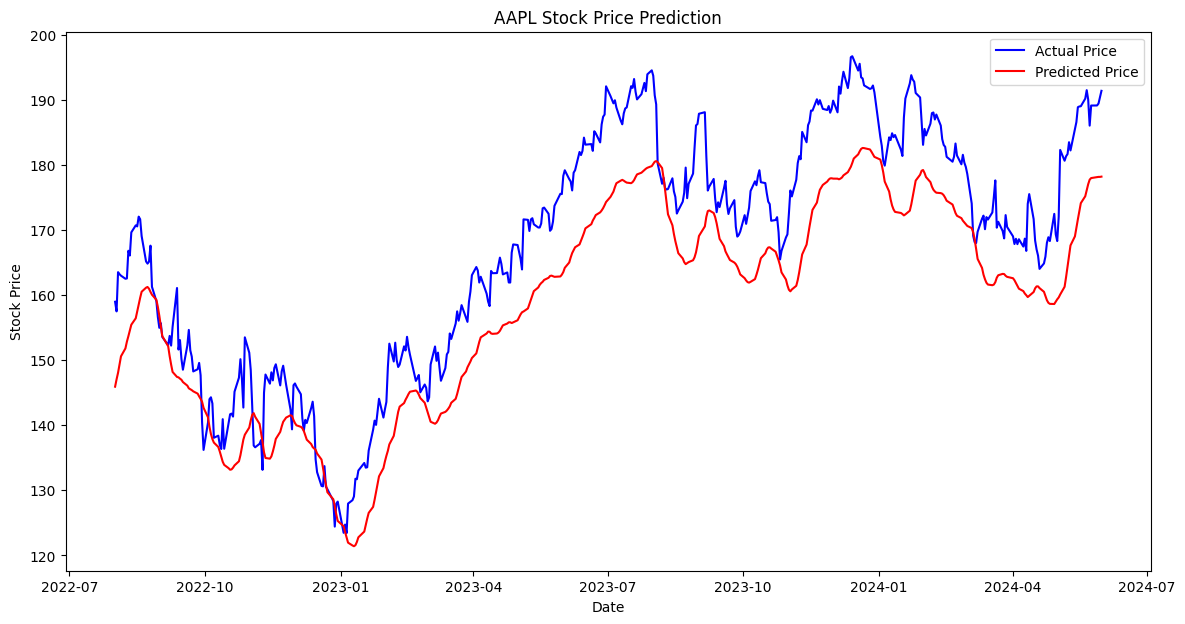

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(df.index[-len(actual):], actual, color='blue', label='Actual Price')
plt.plot(df.index[-len(predictions):], predictions, color='red', label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
